In [6]:
import random

#let count be an object tracking the number of comparisons made
def quicksort(arr, count):
    #base case
    if len(arr)<= 1:
        return arr
    #pick a pivot
    p = random.randint(0, len(arr)-1)
    pivot = arr[p]
    # arrays
    A1, A2 = constructArray(arr, pivot, p, count)
    #sort them
    X = quicksort(A1, count)
    Y = quicksort(A2, count)
    #combine the results array
    A = []
    for i in X:
        A.append(i)
    A.append(pivot)
    for i in Y:
        A.append(i)
    return A

def constructArray(arr, pivot, index, count):
    # A1 is all less than or equal to pivot, A2 is all greater
    A1 = []
    A2 = []
    for i in range(0, len(arr)):
        if arr[i] <= pivot and i != index: 
            A1.append(arr[i])
            count.append(1)
        elif arr[i] > pivot:
            A2.append(arr[i])
            count.append(1)  
    return A1, A2

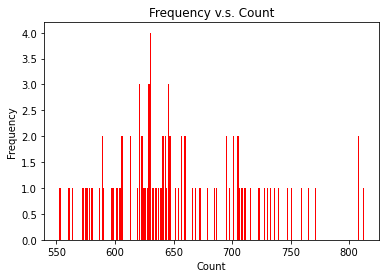

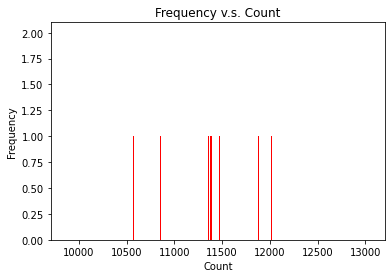

In [10]:
import matplotlib.pyplot as plt

def visualizeQuickSort1():
    for n in [100, 1000]:
        arr = []
        for i in range(0, n):
            arr.append(random.randint(0,n))
        counts = []
        for i in range(0, 100):
            count = []
            quicksort(arr, count)
            counts.append(len(count))
        #process counts
        freqmap = {}
        for count in counts:
            if freqmap.get(count) == None:
                freqmap[count] = 1
            else:
                freqmap[count] = freqmap.get(count) + 1
        frequency = freqmap.keys()
        values = freqmap.values()
        plt.bar(frequency, values, width = 1.0, color = "r")
        plt.ylabel("Frequency")
        plt.xlabel("Count")
        plt.title("Frequency v.s. Count")
        plt.show()
        
    

visualizeQuickSort1()

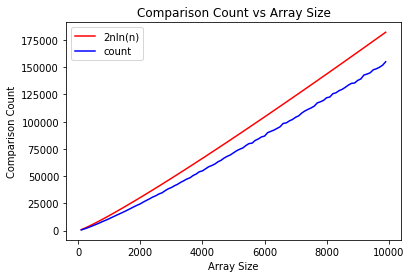

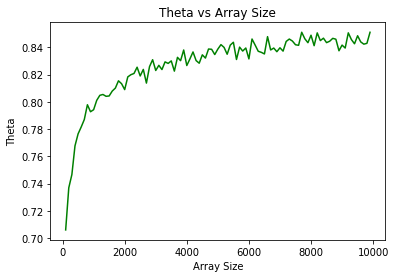

In [11]:
import math
# visualizeQuickSort2: plots the experimental performance of quick sort by measuring against randomly permuted arrays
def visualizeQuickSort2():
    ns = [n for n in range(100, 10000, 100)]
    lns = [2*i*math.log(i) for i in ns]
    thetas = []
    avgs = []
    for n in ns:
        #create array randomly
        arr = []
        for i in range(0, n):
            arr.append(random.randint(0,n))
        counts = 0
        for i in range(0, 100):
            count = []
            quicksort(arr, count)
            counts += len(count)
        avg = counts/100
        avgs.append(avg)
        thetas.append(avg/(2*n*math.log(n)))
    #plot 1: count vs nln(n)
    plt.plot(ns, lns, color = "r", label = "2nln(n)")
    plt.plot(ns, avgs, color = "b", label = "count")
    plt.ylabel("Comparison Count")
    plt.xlabel("Array Size")
    plt.title("Comparison Count vs Array Size")
    plt.legend()
    plt.show()
    #plot 2: whether theta is <= 1
    plt.plot(ns, thetas, color = "g", label = "thetas")
    plt.ylabel("Theta")
    plt.xlabel("Array Size")
    plt.title("Theta vs Array Size")
    plt.show()
        
visualizeQuickSort2()

In [ ]:
# this took about 3 hours 